In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.float_format', '{:.4f}'.format)
%precision 4
plt.rcParams['figure.dpi'] = 150

import yfinance as yf
import requests_cache
session = requests_cache.CachedSession(expire_after='1D')

In [2]:
# Referencing wiki link for all ticker symbols
wiki_link = 'https://en.wikipedia.org/wiki/S%26P_100'
wiki = pd.read_html(wiki_link)

In [3]:
# Pulling tickers from wiki link and saving as 'list' type
tickers = wiki[2]['Symbol'].to_list()
tickers.remove('BRK.B')
tickers.append('BRK-B')

In [4]:
#Pulling stock data for each ticker from Yahoo Finance
stocks = yf.download(tickers, session=session)

[*********************100%***********************]  101 of 101 completed


In [5]:
# Pulling stock data for each ticker from Yahoo Finance
stocks = yf.download(tickers, start = "2020-01-01", end = "2022-08-31", session = session)

[*********************100%***********************]  101 of 101 completed


### 1) Calculate daily returns for the S&P 100 stocks.

In [19]:
stocks.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-08-18', '2022-08-19', '2022-08-22', '2022-08-23',
               '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-29',
               '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', name='Date', length=672, freq=None)

In [6]:
# Daily returns for the S&P 100 stocks
returns = stocks['Adj Close'].dropna().pct_change()

In [7]:
# Change data type of returns to .to_datetime()
returns.index = pd.to_datetime(returns.index)

### 2) How well do these annualized average returns in 2020 predict returns in 2021? 

In [8]:
returns_2020 = returns.loc['2020'].mean().mul(252)
returns_2021 = returns.loc['2021'].mean().mul(252)

#### Comparing 2020 and 2021 annualized average returns.

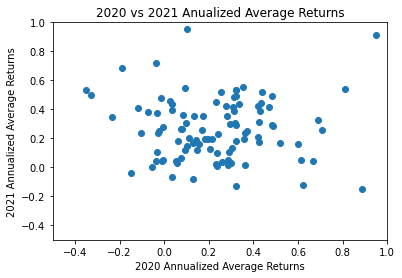

In [9]:
plt.scatter(
    x = returns_2020,
    y = returns_2021
)

plt.title('2020 vs 2021 Anualized Average Returns')
plt.xlabel('2020 Annualized Average Returns')
plt.ylabel('2021 Annualized Average Returns')
plt.ylim(-0.5,1)
plt.xlim(-0.5,1)

plt.show()

#### Analysis:

Based on the plot above, there lacks a correlation between 2020 and 2021 annualized average returns. Given the plot's indistinct pattern, we conclude that there is neither a positive nor negative correlation between the two years. Thus, the annualized average returns from 2020 are not a good indicator of annualized average returns for 2021, and onwards. The annualized average return can help give a general view of the stocks' and S&P 100 index's performance throughout the year, but, as the graph above shows, it does not entail that the annualized average return from the present provides any indication of the future price performance of a given stock.

### 3) How well do these annualized standard deviations in 2020 predict returns in 2021? 

In [10]:
std_2020 = returns['2020'].std().mul(np.sqrt(252))
std_2021 = returns['2021'].std().mul(np.sqrt(252))

/tmp/ipykernel_77316/1801003825.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  std_2020 = returns['2020'].std().mul(np.sqrt(252))
/tmp/ipykernel_77316/1801003825.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  std_2021 = returns['2021'].std().mul(np.sqrt(252))


#### Comparing 2020 and 2021 annualized standard deviations.

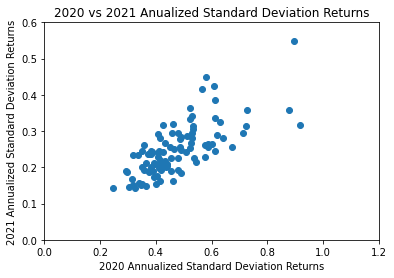

In [11]:
plt.scatter(
    x = std_2020,
    y = std_2021
)
plt.title('2020 vs 2021 Anualized Standard Deviation Returns')
plt.xlabel('2020 Annualized Standard Deviation Returns')
plt.ylabel('2021 Annualized Standard Deviation Returns')
plt.ylim(0.0,.6)
plt.xlim(0.0,1.2)

plt.show()

#### Analysis:

Per the graph above, there is a positive correlation between annualized standard deviation of returns in 2020 and 2021. This correlation may indicate that there is a relationship between each of the stocks in the SP100. Therefore, it can represent how these stocks generally move together, whether or not there is an increase or decrease in standard deviation (volatility). In 2020, during a volatile year in the equities market, the majority of annualized standard deviations of returns cluster around 0.4, while the majority in 2021 are focused around 0.2. From this we can determine a general pattern between the annualized standard deviations of returns in 2021 being double that of 2020. Comparing S&P 100 stocks to themselves, this correlation in volatility can be determined by a pattern of half of the previous year.  

This does not mean that one can predict the future of these stocks. Although there is a correlation between volatility of each stock individually from 2020 to 2021, it is hard to base an estimate of returns off of a similar change in annualized standard deviation of returns. As a whole, 2020 had a range of annualized standard deviations of returns between 0.2 and 0.9 with the majority falling above 0.3, while 2021 differed with a range between 0.1 and below 0.6, and the majority of annualized SDs of returns being below 0.3. This should not give any true predictor, but as seen on the graph, there is an identifiable pattern that can be use to summarize the correlation. 

### 4) What are the mean, median, minimum, and maximum pairwise correlations between two stocks? Discuss and explain any outliers.

In [12]:
correlations = returns.dropna().corr()

#### Calculate mean, median, minimum, and maximum pairwise correlations.

In [13]:
#empty list to hold correlations
corr_list = []

#empty list to hold ticker pairs
ticker_pair = []

#empty list to hold opposite ticker pairs
opp_ticker_pair = []

#iterate through all ticker pairs
for row in correlations.columns:
    for col in correlations.index:
        #checks that both tickers are different and the opposite combination has not already been computed
        if (row != col) & ((row,col) not in opp_ticker_pair):
            opp_ticker_pair.append((col,row))
            ticker_pair.append((row,col))
            corr_list.append((correlations.loc[row,col]))

#creates series with correlations
corr_series = pd.Series(corr_list)

#finding mean, median, min, and max of correlations
corr_mean = corr_series.mean()

corr_med = corr_series.median()

corr_min = corr_series.min()

corr_max = corr_series.max()

#identify specific pairwise correlation stocks
def stock_id(ticker_pair, statistic):
    return ticker_pair[corr_list.index(statistic)]

print("The mean of all pairwise correlations is the following: " , corr_mean)
print("The median of all pairwise correlations is the following: " , corr_med)
print("The minimum of all pairwise correlations is the following: " , corr_min, 
      "\nThe ticker with the min correlation value is: " , stock_id(ticker_pair, corr_min))
print("The maximum of all pairwise correlations is the following: " , corr_max, 
      "\nThe ticker with the max correlation value is: " , stock_id(ticker_pair, corr_max))     

The mean of all pairwise correlations is the following:  0.4750527562834161
The median of all pairwise correlations is the following:  0.47354768658369273
The minimum of all pairwise correlations is the following:  0.060027693487179706 
The ticker with the min correlation value is:  ('TSLA', 'VZ')
The maximum of all pairwise correlations is the following:  0.9937383498539828 
The ticker with the max correlation value is:  ('GOOG', 'GOOGL')


#### Analysis:

The minimum and maximum correlation values are the two outliers of these results. The minimum and maximum have values of about 0.06 and 0.99, respectively, and reflect the two opposite ends of the range of correlation. 

Refer to the correlation formula below, where covariance represents the measure of how two stock prices move together, and the standard deviation represents the measure of volatility of a stock. With regards to this formula, it's possible to assume that two stocks with low correlation will also have low covariance compared to the product of the standard deviations. Conversely, two stocks with high pairwise correlation will have a covariance of almost equal to the product of the standard deviations - this would result closely to a 1:1 relationship between covariance and product of standard deviations, and therefore, close to an almost perfect 1.00 correlation coefficient. This makes sense for stocks with low and high correlations, as they represent companies that are very different and similar, respectively.

$$Corr(x,y)= \frac{Cov(x,y)}{Std(x)*Std(y)}$$


**MIN - TSLA x VZ (0.06):**

The minimum pairwise correlation is between Tesla Inc. and Verizon Communications Inc. is almost zero because of the big difference between the two companies compared here. Tesla is an auto manufacturer company, while Verizon is a telecom services company. Therefore, these two companies operate in two completely different industries. Also, Tesla's business revenue model relies on the consumer business cycle, whereas, Verizon relies on a subscription-based revenues. This means that it is less likely for Verizon's number of wireless subscribers to change over a few percentage points, than for the unit sales of cars manufactures and delivered by Tesla to change due to economic conditions. In a recessionary environment, Tesla should theoretically be impacted heavily when CPI dips as automobile sales fall. As Verizon has more of a subscription model and closer to a commodity type of product, even when demand is low for consumer goods, Verizon's revenue should not be heavily impacted.  

These fundamental differences between Tesla and Verizon translate to a low positive correlation (0.06) between the two stocks within the S&P 100. 


**MAX - GOOG x GOOGL (0.99):**

The maximum pairwise correlation being between Alphabet Inc. Class A and Alphabet Inc. Class C stock makes sense. As these stocks are holding companies for the same company, Google, the only difference is in voting rights (as a Class C stock, shareholders of GOOG do not have voting rights compared to Class A, GOOGL, shareholders). Therefore, they should move identically.


### 5) Plot annualized average returns versus annualized standard deviations of returns. Discuss and explain any outliers.

#### Plotting:

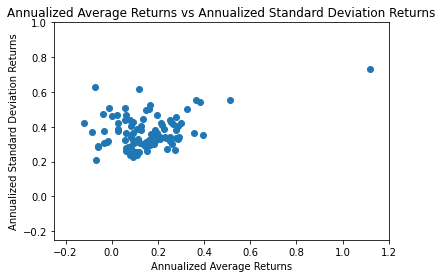

In [14]:
returns_annual = returns.mean().mul(252)
std_annual = returns.std().mul(np.sqrt(252))

plt.scatter(
    x = returns_annual,
    y = std_annual
)
plt.title('Annualized Average Returns vs Annualized Standard Deviation Returns')
plt.xlabel('Annualized Average Returns')
plt.ylabel('Annualized Standard Deviation Returns')
plt.ylim(-0.25,1)
plt.xlim(-0.25,1.2)

plt.show()

In [15]:
outliers_returns = []
outliers_std = []

for i in returns_annual.tolist():
        if i > 0.5:
            outliers_returns.append(i)

for j in std_annual.tolist():
        if j > 0.6:
            outliers_std.append(j)

In [16]:
filtered_returns = returns_annual[returns_annual.isin(outliers_returns)]
filtered_returns

NVDA   0.5114
TSLA   1.1204
dtype: float64

In [17]:
filtered_std = std_annual[std_annual.isin(outliers_std)]
filtered_std

BA     0.6278
SPG    0.6170
TSLA   0.7290
dtype: float64

In [22]:
returns_annual.loc[returns_annual > 0.5]

NVDA   0.5114
TSLA   1.1204
dtype: float64

#### Analysis:

The graph depicts the relationship between annualized average returns and the standard deviation of the S&P100 stocks in 2020 and 2021. From the graph, we can conclude there is no discernible correlation between the two factors. For instance, some stocks have high volatility but low returns, whereas others have low volatility but high returns. In an ideal market, this would not be the case. However, the discretion can be explained due to the pandemic's impact on the markets. 

In addition, based on the above results, we can conclude the outlier from this data set is Tesla. At its core, Tesla is an automotive electric vehicle company. Its primary sales products are electric vehicles, however, it is interesting to note that relative to its peers, it does not manufacture many cars, or had its enviable 20% gross margin translate into consistent profits in 2021. Tesla is a highly volatile investment where investors are accustomed to both big spikes and swoons, as well as plenty of short bets on the company's inflated valuations. To this point, even the company's CEO, Elon Musk, has at times called shares 'overvalued'. 

Coupled with Tesla's idiosyncratic risks, during pandemic times, stock markets underwent a series of unpredictable freefalls and upticks, which in turn made many investments highly volatile. Tesla's stock performance was no exception to the impact of an unprecedented market environment. During the period under observation, the global economy faced supply chain issues, specifically in the semiconductor industry. Tesla's products were highly dependent on this technology, and the shortage combined with supply chain problems, impacted the returns and volatility of the stock.

### 6) Repeat the exercise above (question 5) with 100 random portfolios of 2, 5, 10, and 25 stocks. For simplicity, use equal-weighted portfolios and re-balance daily.

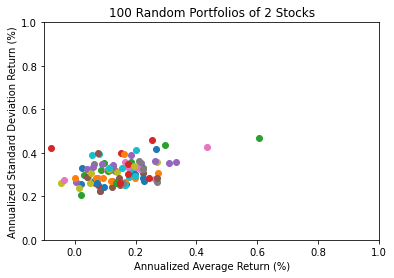

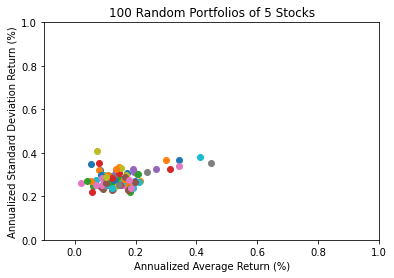

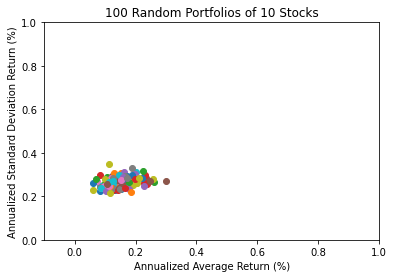

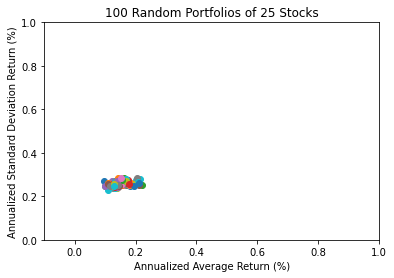

In [24]:
np.random.seed(42) 
def port_plot(n_stocks):
    for i in range(100): 
        sample = returns[tickers].sample(n=n_stocks, axis=1)
        portfolio = sample.mean(axis=1)
        port_mean = portfolio.mean()*252
        port_std = portfolio.std()*np.sqrt(252)
        plt.scatter(port_mean, port_std)
    plt.xlabel('Annualized Average Return (%)')
    plt.ylabel('Annualized Standard Deviation Return (%)')
    plt.xlim(-.1,1)
    plt.ylim(0,1)
    # plt.title('100 Random Portfolios of ' +str(n_stocks)+ ' Stocks')
    plt.title(f'100 Random Portfolios of {n_stocks:d} Stocks')

    plt.show()

port_plot(2)
port_plot(5)
port_plot(10)
port_plot(25)

### Analysis:

In question 6, we are tasked with creating a dot plot of portfolios containing 2, 5, 10, and 25 stocks. From a financial perspective, this is creating diversity even in the safety of the S&P 100. Beginning with 2 stocks, it is not surprising that there was a wider range of annual returns and standard deviations with the same idea of being the portfolio with the least diversity. As the portfolios gain diversity, they concentrate on the average annualized standard deviation of returns and annualized average return. This is a true visualization of what diversity does to portfolio returns and what level of risk in volatility a portfolio has.    